In [1]:
#Untuk data frame
import pandas as pd
import numpy as np

#untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ============  Non Regresor ============================\n",
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

# ============  Regressor  ============================\n",
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#============== metric ===========================================
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

#untuk spliting data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, mean_absolute_error



In [2]:
# ! pip install seaborn

In [3]:
# Load the dataset
data = pd.read_excel("2022_drugs_perez_dataset2.xlsx")

In [4]:
data_model = data.loc[:,['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']] = data[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']]

In [5]:
data_model.dropna(inplace=True)

In [6]:
data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']] = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IE EXP (%)']].replace(',', '.', regex=True)

In [7]:
data_model["Polarizability (Å3)"] = data_model["Polarizability (Å3)"].astype('float')

In [8]:
data_model

,Molecular_weight MW (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Electronegativity (eV),ΔN_Fe,IE EXP (%)
0,194.190,14.00,-0.07,-0.97,58.44,18.96,-5.769,-1.977,3.8730,0.824631,92.000
2,151.160,9.90,0.91,-1.60,49.33,15.52,-5.494,-1.646,3.5700,0.891372,85.800
3,222.300,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,5.1840,0.497262,93.000
4,60.050,4.80,-0.17,1.22,37.30,5.34,-6.816,-1.070,3.9430,0.532022,92.000
11,137.140,3.38,0.83,-0.40,63.32,13.44,-5.922,-2.122,4.0220,0.783684,80.000
...,...,...,...,...,...,...,...,...,...,...,...
246,290.320,7.20,0.91,-2.86,105.51,29.71,-5.374,-1.307,3.3405,0.899803,92.000
250,60.056,0.20,-2.11,0.96,69.11,5.10,-6.050,0.332,2.8590,0.648856,94.060
254,308.300,5.10,2.70,-3.89,63.60,31.93,-6.042,-2.842,4.4420,0.799375,93.484
256,75.070,75.07,-3.21,0.87,63.32,6.65,-6.339,-0.773,3.5560,0.618757,80.000


In [9]:
# X = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']]
# y = data_model['IE EXP (%)']

In [10]:
# Membuat objek scaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada data
normalized_data = scaler.fit_transform(data_model)

# Mengonversi data yang telah dinormalisasi menjadi data frame
normalized_df = pd.DataFrame(normalized_data, columns=data_model.columns)

In [11]:
X = normalized_df[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']]
y = normalized_df['IE EXP (%)']

In [12]:
def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    plt.scatter(y, prediction)
    plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted',label='Nilai Sebenarnya')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Scatter Plot of Actual vs. Predicted Values")
    plt.show()

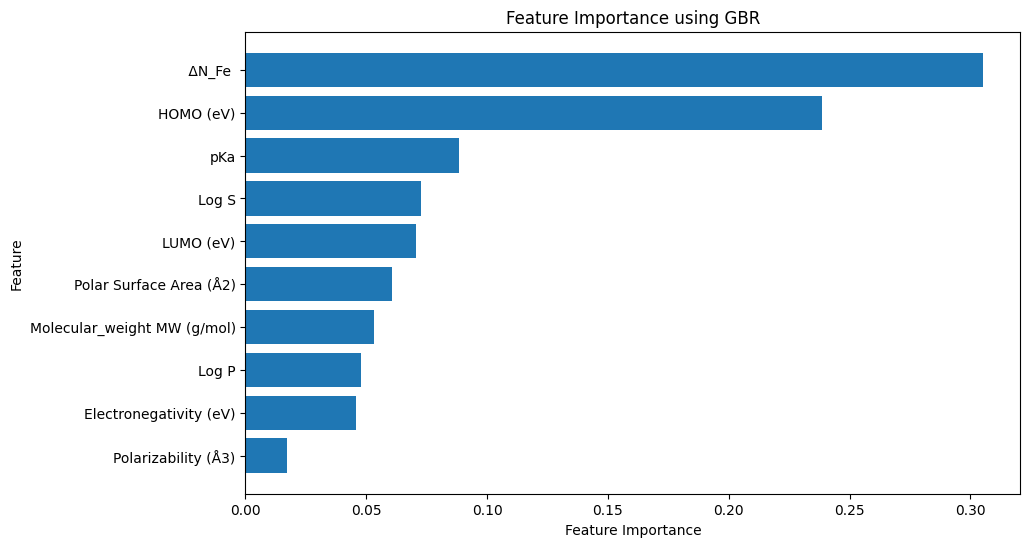

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Contoh data
X = normalized_df[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']]
y = normalized_df['IE EXP (%)']

# Inisialisasi model GBR
gbr = GradientBoostingRegressor()

# Fit model pada data
gbr.fit(X, y)

# Mengambil fitur importance dari model
feature_importance = gbr.feature_importances_

# Mengurutkan indeks berdasarkan fitur importance
sorted_idx = np.argsort(feature_importance)

# Mengambil nama fitur dari indeks yang diurutkan
feature_names = X.columns[sorted_idx]

# Visualisasi fitur importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using GBR')
plt.show()


# GBR

Mean Squared Error: 6.174675993018759e-10
Root Mean Squared Error: 2.4848895333633564e-05
Mean Absolute Error: 2.0965883447250644e-05
R^2 Score: 0.9999999816835438


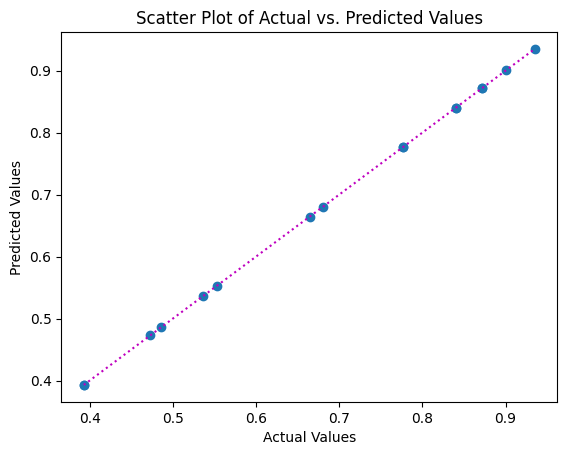

 
Mean Squared Error: 0.00030938646586626173
Root Mean Squared Error: 0.017589385033771412
Mean Absolute Error: 0.014385472284032638
R^2 Score: 0.9932196635023325


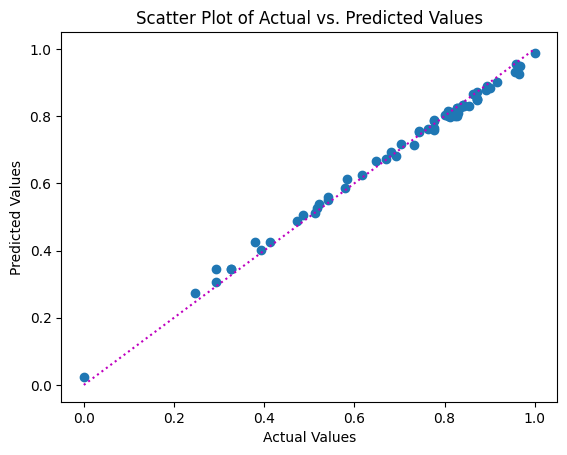

In [14]:
# Bagi data menjadi subset pelatihan (60%) dan pengujian (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = GradientBoostingRegressor()

# Evaluasi model pada subset pengujian
evaluation(X_test, y_test, model)
print(" ")
evaluation(X_train,y_train,model)

Hasil Testing GBR + SPLITING 30:70
Mean Squared Error: 4.14890752403331e-08
Root Mean Squared Error: 0.0002036886723417213
Mean Absolute Error: 0.00016237398168308706
R^2 Score: 0.9999985536345751
 
Hasil Training GBR + SPLITING 30:70
Mean Squared Error: 0.00023244180401733386
Root Mean Squared Error: 0.01524604224109765
Mean Absolute Error: 0.012402311901490663
R^2 Score: 0.9952928373373786


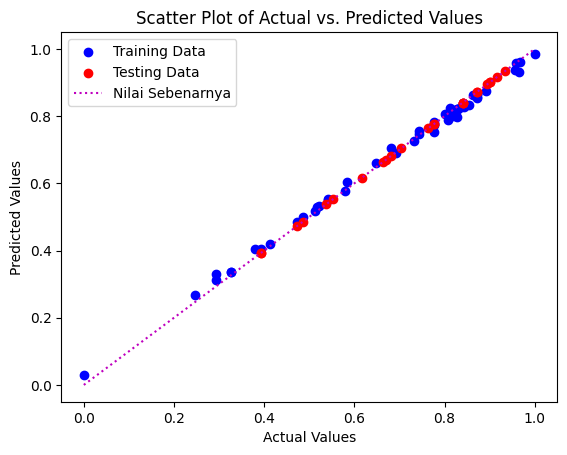

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (60%) dan pengujian (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 30:70")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training GBR + SPLITING 30:70")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing GBR + SPLITING 40:60
Mean Squared Error: 3.5020119743472396e-06
Root Mean Squared Error: 0.0018713663388944559
Mean Absolute Error: 0.0014401159269312328
R^2 Score: 0.9998931086352548
 
Hasil Training GBR + SPLITING 40:60
Mean Squared Error: 5.7875760515455926e-05
Root Mean Squared Error: 0.007607612011364402
Mean Absolute Error: 0.006240970988905701
R^2 Score: 0.9988327775865324


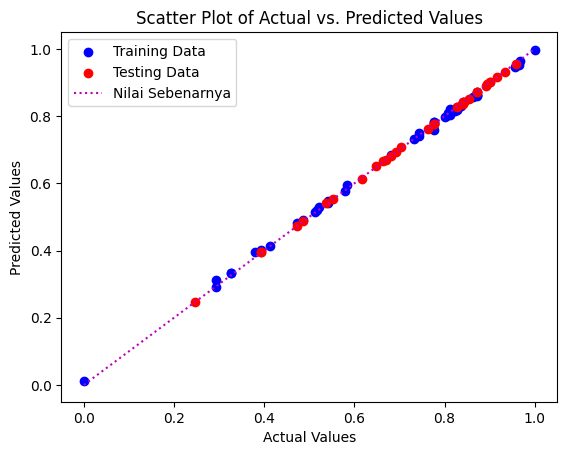

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (60%) dan pengujian (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 40:60")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training GBR + SPLITING 40:60")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing GBR + SPLITING 40:60
Mean Squared Error: 3.5020119743472396e-06
Root Mean Squared Error: 0.0018713663388944559
Mean Absolute Error: 0.0014401159269312328
R^2 Score: 0.9998931086352548
 
Hasil Training GBR + SPLITING 40:60
Mean Squared Error: 5.7875760515455926e-05
Root Mean Squared Error: 0.007607612011364402
Mean Absolute Error: 0.006240970988905701
R^2 Score: 0.9988327775865324


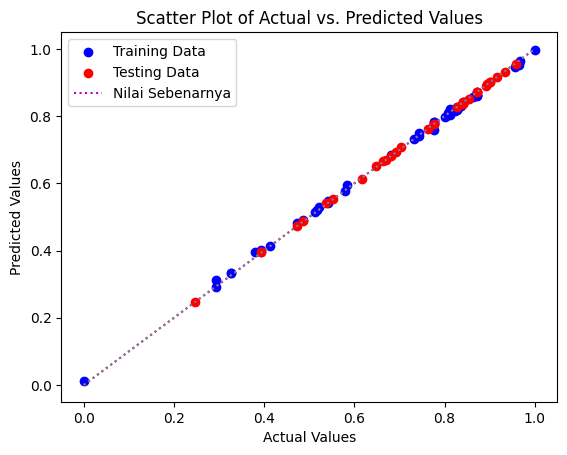

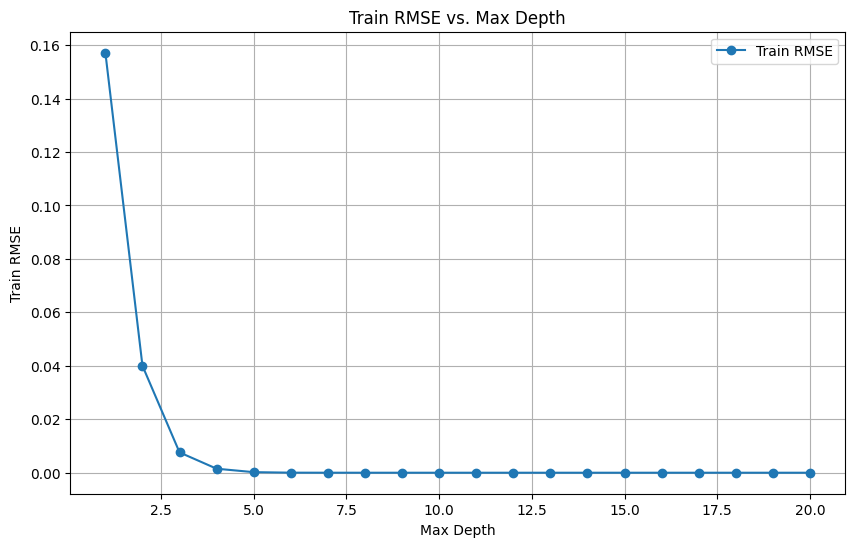

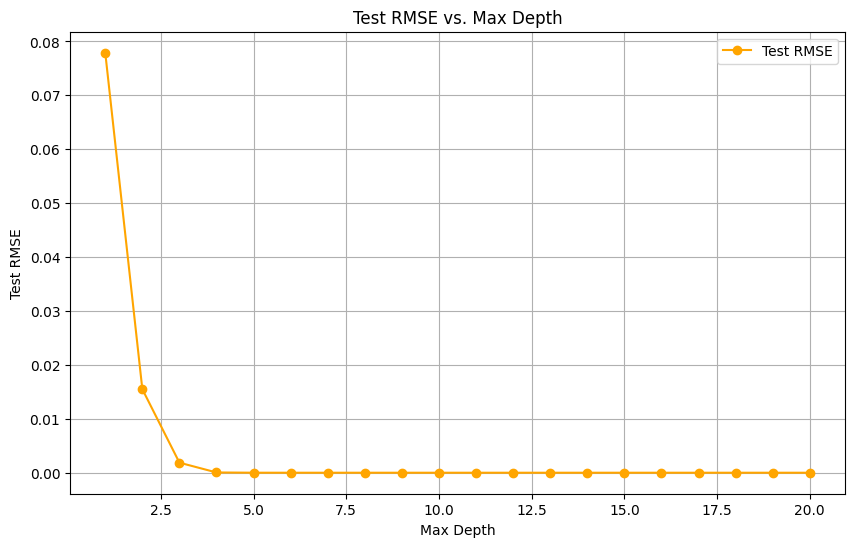

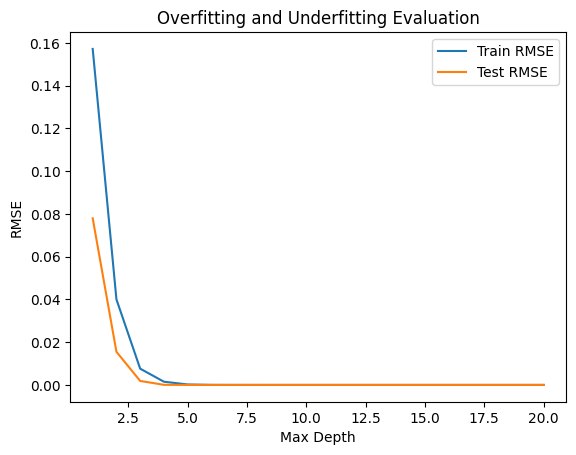

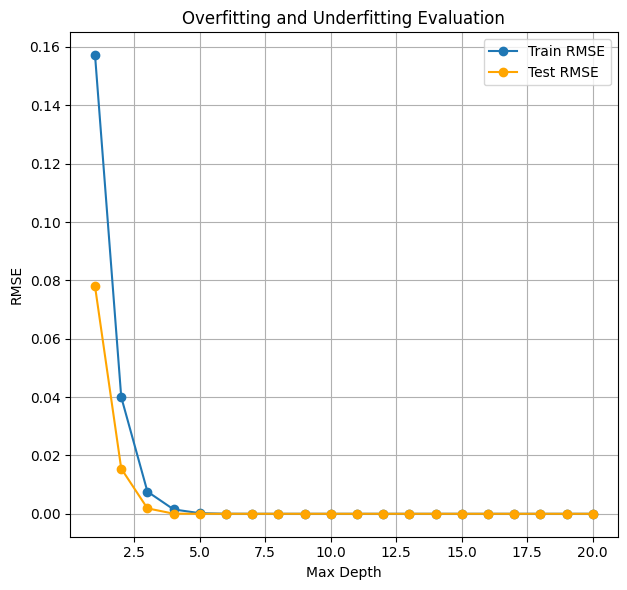

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

def evaluation_rmse(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, prediction))
    return rmse

# Bagi data menjadi subset pelatihan (60%) dan pengujian (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 40:60")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training GBR + SPLITING 40:60")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()

# Visualisasi garis ideal untuk model yang baik
x_line = np.linspace(min(y), max(y), 100)
plt.plot(x_line, x_line, color='gray', linestyle='dotted', label='Ideal Line')

plt.show()

max_depth_range = range(1, 21)  # Change the range for a more comprehensive evaluation
train_rmse = []
test_rmse = []

for max_depth in max_depth_range:
    gbr = GradientBoostingRegressor(max_depth=max_depth, random_state=42)
    train_rmse.append(evaluation_rmse(X_train, y_train, gbr))
    test_rmse.append(evaluation_rmse(X_test, y_test, gbr))
    
# Visualisasi grafik evaluasi model untuk pelatihan
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_rmse, marker='o', label='Train RMSE')
plt.xlabel('Max Depth')
plt.ylabel('Train RMSE')
plt.title('Train RMSE vs. Max Depth')
plt.legend()
plt.grid()
plt.show()

# Visualisasi grafik evaluasi model untuk pengujian
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, test_rmse, marker='o', label='Test RMSE', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs. Max Depth')
plt.legend()
plt.grid()
plt.show()

# Visualisasi grafik evaluasi model untuk overfitting dan underfitting
plt.plot(max_depth_range, train_rmse, label='Train RMSE')
plt.plot(max_depth_range, test_rmse, label='Test RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Overfitting and Underfitting Evaluation')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))


# Grafik evaluasi RMSE
plt.subplot(1, 2, 2)
plt.plot(max_depth_range, train_rmse, marker='o', label='Train RMSE')
plt.plot(max_depth_range, test_rmse, marker='o', label='Test RMSE', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Overfitting and Underfitting Evaluation')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Hasil Testing GBR + SPLITING 40:60
Mean Squared Error: 3.5020119743472396e-06
Root Mean Squared Error: 0.0018713663388944559
Mean Absolute Error: 0.0014401159269312328
R^2 Score: 0.9998931086352548
 
Hasil Training GBR + SPLITING 40:60
Mean Squared Error: 5.7875760515455926e-05
Root Mean Squared Error: 0.007607612011364402
Mean Absolute Error: 0.006240970988905701
R^2 Score: 0.9988327775865324


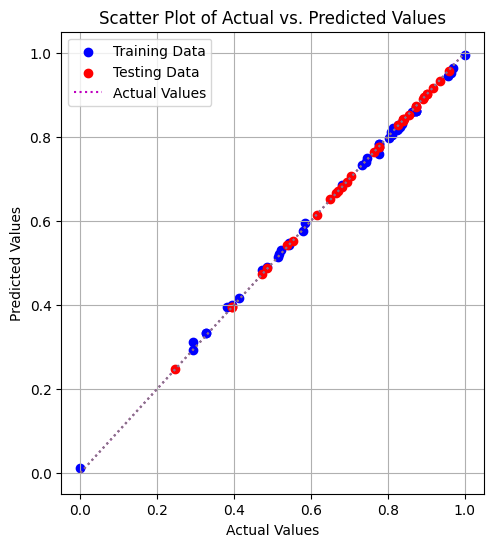

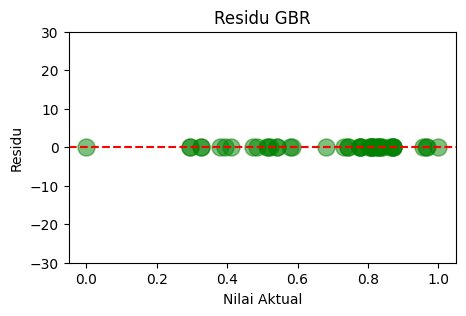

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

def evaluation_rmse(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, prediction))
    return rmse

# Bagi data menjadi subset pelatihan (60%) dan pengujian (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 40:60")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training GBR + SPLITING 40:60")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.grid()

# Visualisasi garis ideal untuk model yang baik
x_line = np.linspace(min(y), max(y), 100)
plt.plot(x_line, x_line, color='gray', linestyle='dotted', label='Ideal Line')


residuals2 = y_train - prediction_train

plt.figure(figsize=(5, 3))
plt.scatter(y_train, residuals2, color='g', s=150, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Residu')
plt.title('Residu GBR')
plt.ylim(-30, 30)
# plt.savefig('Residu Decision Tree Regressor')
plt.show()

Hasil Testing GBR + SPLITING 40:60 + poli
Mean Squared Error: 8.695425682473475e-08
Root Mean Squared Error: 0.00029488007193558327
Mean Absolute Error: 0.00023734525067134384
R^2 Score: 0.9999973459087946
 
Hasil Training GBR + SPLITING 40:60 + poli
Mean Squared Error: 4.971108995875356e-06
Root Mean Squared Error: 0.002229598393405269
Mean Absolute Error: 0.0017962846836918499
R^2 Score: 0.9998997440415798


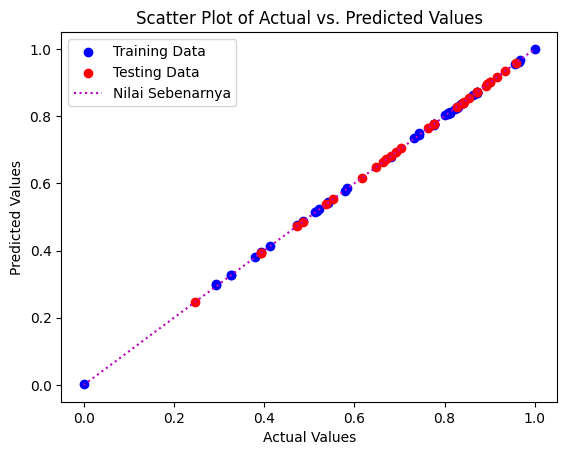

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import joblib , pickle

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model dengan fitur polinomial derajat 2
model_pipeline = make_pipeline(PolynomialFeatures(degree=2), GradientBoostingRegressor())

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 40:60 + poli")
prediction_test = evaluation(X_test, y_test, model_pipeline)
print(" ")
print("Hasil Training GBR + SPLITING 40:60 + poli")
prediction_train = evaluation(X_train, y_train, model_pipeline)

joblib.dump(model_pipeline, 'modelgbrpoly_forweb.joblib')
    
with open('modelgbrpoly_forweb.pkl', 'wb') as file :
    pickle.dump(model_pipeline, file)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()



Hasil Testing GBR + SPLITING 40:60 + poli
Mean Squared Error: 4.561662765940538e-10
Root Mean Squared Error: 2.1358049456681522e-05
Mean Absolute Error: 1.6666748033757582e-05
R^2 Score: 0.999999986076508
 
Hasil Training GBR + SPLITING 40:60 + poli
Mean Squared Error: 5.484256363435378e-08
Root Mean Squared Error: 0.00023418489198569957
Mean Absolute Error: 0.00019092176776857334
R^2 Score: 0.9999988939502666
DONE


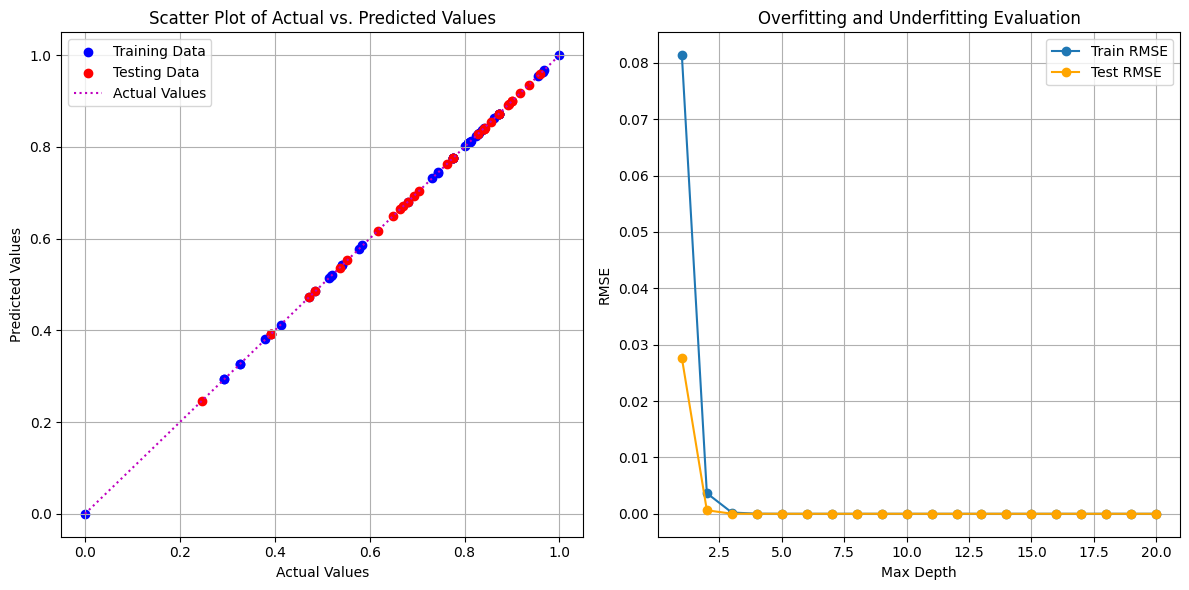

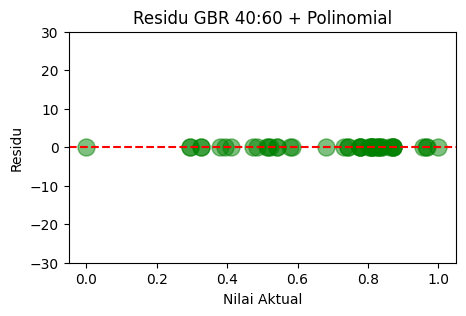

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import joblib , pickle

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (60%) dan pengujian (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model dengan fitur polinomial derajat 2
model_pipeline = make_pipeline(PolynomialFeatures(degree=5), GradientBoostingRegressor())

# joblib.dump(model_pipeline, 'modelgbrpoly_forweb.joblib')
    
# with open('modelgbrpoly_forweb.pkl', 'wb') as file :
#     pickle.dump(model_pipeline, file)

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 40:60 + poli")
prediction_test = evaluation(X_test, y_test, model_pipeline)
print(" ")
print("Hasil Training GBR + SPLITING 40:60 + poli")
prediction_train = evaluation(X_train, y_train, model_pipeline)
print("DONE")

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.figure(figsize=(12, 6))

# Scatter plot hasil training dan testing
plt.subplot(1, 2, 1)
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.grid()

# Grafik evaluasi model untuk overfitting dan underfitting
plt.subplot(1, 2, 2)
max_depth_range = range(1, 21)
train_rmse = []
test_rmse = []

for max_depth in max_depth_range:
    model_pipeline = make_pipeline(PolynomialFeatures(degree=5), GradientBoostingRegressor(max_depth=max_depth, random_state=42))
    train_rmse.append(evaluation_rmse(X_train, y_train, model_pipeline))
    test_rmse.append(evaluation_rmse(X_test, y_test, model_pipeline))

plt.plot(max_depth_range, train_rmse, marker='o', label='Train RMSE')
plt.plot(max_depth_range, test_rmse, marker='o', label='Test RMSE', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Overfitting and Underfitting Evaluation')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

residuals2 = y_train - prediction_train

plt.figure(figsize=(5, 3))
plt.scatter(y_train, residuals2, color='g', s=150, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Residu')
plt.title('Residu GBR 40:60 + Polinomial')
plt.ylim(-30, 30)
plt.show()

# === PEMISAH ===

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import joblib , pickle

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    joblib.dump(model, 'modelcatboost_forweb.joblib')
    
    with open('modelcatboost_forweb.pkl', 'wb') as file :
        pickle.dump(model, file)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model dengan fitur polinomial derajat 2
model_pipeline = make_pipeline(PolynomialFeatures(degree=5), CatBoostRegressor())

# Evaluasi model pada subset pengujian
print("Hasil Testing Catboost + SPLITING 80:20 + poli")
prediction_test = evaluation(X_test, y_test, model_pipeline)
print(" ")
print("Hasil Training Catboost + SPLITING 80:20 + poli")
prediction_train = evaluation(X_train, y_train, model_pipeline)
print("DONE")

Hasil Testing Catboost + SPLITING 80:20 + poli
Learning rate set to 0.021302
0:	learn: 0.1823292	total: 423ms	remaining: 7m 2s
1:	learn: 0.1814375	total: 579ms	remaining: 4m 48s
2:	learn: 0.1797674	total: 643ms	remaining: 3m 33s
3:	learn: 0.1786289	total: 738ms	remaining: 3m 3s
4:	learn: 0.1775985	total: 828ms	remaining: 2m 44s
5:	learn: 0.1759650	total: 925ms	remaining: 2m 33s
6:	learn: 0.1746988	total: 1.01s	remaining: 2m 23s
7:	learn: 0.1734485	total: 1.13s	remaining: 2m 19s
8:	learn: 0.1724222	total: 1.27s	remaining: 2m 19s
9:	learn: 0.1714609	total: 1.4s	remaining: 2m 18s
10:	learn: 0.1701452	total: 1.48s	remaining: 2m 13s
11:	learn: 0.1689173	total: 1.58s	remaining: 2m 10s
12:	learn: 0.1675887	total: 1.67s	remaining: 2m 7s
13:	learn: 0.1663980	total: 1.74s	remaining: 2m 2s
14:	learn: 0.1648868	total: 1.8s	remaining: 1m 58s
15:	learn: 0.1639838	total: 1.9s	remaining: 1m 56s
16:	learn: 0.1629705	total: 2s	remaining: 1m 55s
17:	learn: 0.1615571	total: 2.1s	remaining: 1m 54s
18:	lear

157:	learn: 0.0604736	total: 16.7s	remaining: 1m 28s
158:	learn: 0.0601528	total: 16.8s	remaining: 1m 28s
159:	learn: 0.0597261	total: 16.9s	remaining: 1m 28s
160:	learn: 0.0593090	total: 17s	remaining: 1m 28s
161:	learn: 0.0587751	total: 17.1s	remaining: 1m 28s
162:	learn: 0.0584002	total: 17.2s	remaining: 1m 28s
163:	learn: 0.0580672	total: 17.3s	remaining: 1m 28s
164:	learn: 0.0576575	total: 17.4s	remaining: 1m 28s
165:	learn: 0.0572863	total: 17.5s	remaining: 1m 28s
166:	learn: 0.0569652	total: 17.6s	remaining: 1m 27s
167:	learn: 0.0566358	total: 17.8s	remaining: 1m 27s
168:	learn: 0.0562077	total: 17.8s	remaining: 1m 27s
169:	learn: 0.0558804	total: 17.9s	remaining: 1m 27s
170:	learn: 0.0555695	total: 18s	remaining: 1m 27s
171:	learn: 0.0552615	total: 18.1s	remaining: 1m 27s
172:	learn: 0.0549657	total: 18.3s	remaining: 1m 27s
173:	learn: 0.0546217	total: 18.4s	remaining: 1m 27s
174:	learn: 0.0543293	total: 18.5s	remaining: 1m 27s
175:	learn: 0.0540046	total: 18.6s	remaining: 1m 2

314:	learn: 0.0231486	total: 34s	remaining: 1m 13s
315:	learn: 0.0230253	total: 34.1s	remaining: 1m 13s
316:	learn: 0.0229027	total: 34.2s	remaining: 1m 13s
317:	learn: 0.0227807	total: 34.3s	remaining: 1m 13s
318:	learn: 0.0226594	total: 34.4s	remaining: 1m 13s
319:	learn: 0.0225387	total: 34.5s	remaining: 1m 13s
320:	learn: 0.0224187	total: 34.6s	remaining: 1m 13s
321:	learn: 0.0222993	total: 34.7s	remaining: 1m 13s
322:	learn: 0.0221805	total: 34.8s	remaining: 1m 12s
323:	learn: 0.0220623	total: 34.9s	remaining: 1m 12s
324:	learn: 0.0219449	total: 35s	remaining: 1m 12s
325:	learn: 0.0218280	total: 35.1s	remaining: 1m 12s
326:	learn: 0.0217117	total: 35.1s	remaining: 1m 12s
327:	learn: 0.0215961	total: 35.2s	remaining: 1m 12s
328:	learn: 0.0214811	total: 35.3s	remaining: 1m 12s
329:	learn: 0.0213667	total: 35.4s	remaining: 1m 11s
330:	learn: 0.0212529	total: 35.5s	remaining: 1m 11s
331:	learn: 0.0211397	total: 35.6s	remaining: 1m 11s
332:	learn: 0.0210272	total: 35.7s	remaining: 1m 1

470:	learn: 0.0100636	total: 1m 3s	remaining: 1m 11s
471:	learn: 0.0100100	total: 1m 3s	remaining: 1m 11s
472:	learn: 0.0099567	total: 1m 4s	remaining: 1m 11s
473:	learn: 0.0099037	total: 1m 4s	remaining: 1m 11s
474:	learn: 0.0098509	total: 1m 4s	remaining: 1m 11s
475:	learn: 0.0097985	total: 1m 4s	remaining: 1m 11s
476:	learn: 0.0097463	total: 1m 5s	remaining: 1m 11s
477:	learn: 0.0096944	total: 1m 5s	remaining: 1m 11s
478:	learn: 0.0096428	total: 1m 5s	remaining: 1m 11s
479:	learn: 0.0095914	total: 1m 5s	remaining: 1m 10s
480:	learn: 0.0095403	total: 1m 5s	remaining: 1m 10s
481:	learn: 0.0094895	total: 1m 6s	remaining: 1m 11s
482:	learn: 0.0094390	total: 1m 6s	remaining: 1m 10s
483:	learn: 0.0093887	total: 1m 6s	remaining: 1m 10s
484:	learn: 0.0093387	total: 1m 6s	remaining: 1m 10s
485:	learn: 0.0092890	total: 1m 6s	remaining: 1m 10s
486:	learn: 0.0092395	total: 1m 7s	remaining: 1m 10s
487:	learn: 0.0091903	total: 1m 7s	remaining: 1m 10s
488:	learn: 0.0091414	total: 1m 7s	remaining: 

627:	learn: 0.0043518	total: 1m 26s	remaining: 51.3s
628:	learn: 0.0043286	total: 1m 26s	remaining: 51.1s
629:	learn: 0.0043056	total: 1m 26s	remaining: 50.9s
630:	learn: 0.0042826	total: 1m 26s	remaining: 50.8s
631:	learn: 0.0042598	total: 1m 26s	remaining: 50.6s
632:	learn: 0.0042371	total: 1m 27s	remaining: 50.5s
633:	learn: 0.0042146	total: 1m 27s	remaining: 50.3s
634:	learn: 0.0041921	total: 1m 27s	remaining: 50.2s
635:	learn: 0.0041698	total: 1m 27s	remaining: 50s
636:	learn: 0.0041476	total: 1m 27s	remaining: 49.9s
637:	learn: 0.0041255	total: 1m 27s	remaining: 49.7s
638:	learn: 0.0041035	total: 1m 27s	remaining: 49.6s
639:	learn: 0.0040817	total: 1m 27s	remaining: 49.4s
640:	learn: 0.0040600	total: 1m 28s	remaining: 49.3s
641:	learn: 0.0040383	total: 1m 28s	remaining: 49.2s
642:	learn: 0.0040168	total: 1m 28s	remaining: 49s
643:	learn: 0.0039954	total: 1m 28s	remaining: 48.9s
644:	learn: 0.0039742	total: 1m 28s	remaining: 48.7s
645:	learn: 0.0039530	total: 1m 28s	remaining: 48.

783:	learn: 0.0018919	total: 1m 45s	remaining: 29s
784:	learn: 0.0018818	total: 1m 45s	remaining: 28.9s
785:	learn: 0.0018718	total: 1m 45s	remaining: 28.8s
786:	learn: 0.0018618	total: 1m 46s	remaining: 28.7s
787:	learn: 0.0018519	total: 1m 46s	remaining: 28.6s
788:	learn: 0.0018421	total: 1m 46s	remaining: 28.5s
789:	learn: 0.0018323	total: 1m 46s	remaining: 28.4s
790:	learn: 0.0018225	total: 1m 46s	remaining: 28.3s
791:	learn: 0.0018128	total: 1m 47s	remaining: 28.2s
792:	learn: 0.0018031	total: 1m 47s	remaining: 28s
793:	learn: 0.0017935	total: 1m 47s	remaining: 27.9s
794:	learn: 0.0017840	total: 1m 47s	remaining: 27.8s
795:	learn: 0.0017745	total: 1m 48s	remaining: 27.7s
796:	learn: 0.0017650	total: 1m 48s	remaining: 27.6s
797:	learn: 0.0017556	total: 1m 48s	remaining: 27.5s
798:	learn: 0.0017463	total: 1m 48s	remaining: 27.4s
799:	learn: 0.0017370	total: 1m 48s	remaining: 27.2s
800:	learn: 0.0017277	total: 1m 49s	remaining: 27.1s
801:	learn: 0.0017185	total: 1m 49s	remaining: 27s

942:	learn: 0.0008094	total: 2m 6s	remaining: 7.66s
943:	learn: 0.0008051	total: 2m 6s	remaining: 7.52s
944:	learn: 0.0008008	total: 2m 6s	remaining: 7.38s
945:	learn: 0.0007966	total: 2m 6s	remaining: 7.24s
946:	learn: 0.0007923	total: 2m 7s	remaining: 7.11s
947:	learn: 0.0007881	total: 2m 7s	remaining: 6.97s
948:	learn: 0.0007839	total: 2m 7s	remaining: 6.83s
949:	learn: 0.0007797	total: 2m 7s	remaining: 6.7s
950:	learn: 0.0007756	total: 2m 7s	remaining: 6.56s
951:	learn: 0.0007714	total: 2m 7s	remaining: 6.42s
952:	learn: 0.0007673	total: 2m 7s	remaining: 6.29s
953:	learn: 0.0007633	total: 2m 7s	remaining: 6.15s
954:	learn: 0.0007592	total: 2m 7s	remaining: 6.02s
955:	learn: 0.0007551	total: 2m 7s	remaining: 5.88s
956:	learn: 0.0007511	total: 2m 7s	remaining: 5.75s
957:	learn: 0.0007471	total: 2m 7s	remaining: 5.61s
958:	learn: 0.0007431	total: 2m 8s	remaining: 5.47s
959:	learn: 0.0007392	total: 2m 8s	remaining: 5.34s
960:	learn: 0.0007353	total: 2m 8s	remaining: 5.2s
961:	learn: 0.

96:	learn: 0.1183739	total: 31.8s	remaining: 4m 55s
97:	learn: 0.1178153	total: 32s	remaining: 4m 54s
98:	learn: 0.1167806	total: 32.2s	remaining: 4m 53s
99:	learn: 0.1159937	total: 32.5s	remaining: 4m 52s
100:	learn: 0.1155007	total: 32.7s	remaining: 4m 51s
101:	learn: 0.1146974	total: 33s	remaining: 4m 50s
102:	learn: 0.1134593	total: 33.2s	remaining: 4m 49s
103:	learn: 0.1127884	total: 33.5s	remaining: 4m 48s
104:	learn: 0.1121328	total: 33.8s	remaining: 4m 47s
105:	learn: 0.1115225	total: 34s	remaining: 4m 46s
106:	learn: 0.1105966	total: 34.3s	remaining: 4m 46s
107:	learn: 0.1101267	total: 34.5s	remaining: 4m 44s
108:	learn: 0.1096415	total: 34.7s	remaining: 4m 43s
109:	learn: 0.1087810	total: 35.3s	remaining: 4m 45s
110:	learn: 0.1079905	total: 35.8s	remaining: 4m 46s
111:	learn: 0.1076854	total: 36.5s	remaining: 4m 49s
112:	learn: 0.1069988	total: 36.9s	remaining: 4m 49s
113:	learn: 0.1062486	total: 37.3s	remaining: 4m 49s
114:	learn: 0.1054067	total: 37.8s	remaining: 4m 50s
115

252:	learn: 0.0442789	total: 1m 17s	remaining: 3m 50s
253:	learn: 0.0437360	total: 1m 18s	remaining: 3m 50s
254:	learn: 0.0432921	total: 1m 18s	remaining: 3m 49s
255:	learn: 0.0429909	total: 1m 18s	remaining: 3m 49s
256:	learn: 0.0427871	total: 1m 19s	remaining: 3m 49s
257:	learn: 0.0423711	total: 1m 19s	remaining: 3m 48s
258:	learn: 0.0419106	total: 1m 19s	remaining: 3m 48s
259:	learn: 0.0414611	total: 1m 20s	remaining: 3m 47s
260:	learn: 0.0412866	total: 1m 20s	remaining: 3m 47s
261:	learn: 0.0410140	total: 1m 20s	remaining: 3m 46s
262:	learn: 0.0407274	total: 1m 20s	remaining: 3m 46s
263:	learn: 0.0403960	total: 1m 21s	remaining: 3m 45s
264:	learn: 0.0399701	total: 1m 21s	remaining: 3m 45s
265:	learn: 0.0396867	total: 1m 21s	remaining: 3m 44s
266:	learn: 0.0393044	total: 1m 21s	remaining: 3m 44s
267:	learn: 0.0389615	total: 1m 22s	remaining: 3m 43s
268:	learn: 0.0385935	total: 1m 22s	remaining: 3m 43s
269:	learn: 0.0381750	total: 1m 22s	remaining: 3m 43s
270:	learn: 0.0377486	total:

405:	learn: 0.0118740	total: 2m 11s	remaining: 3m 12s
406:	learn: 0.0117655	total: 2m 12s	remaining: 3m 12s
407:	learn: 0.0116339	total: 2m 12s	remaining: 3m 12s
408:	learn: 0.0115221	total: 2m 13s	remaining: 3m 12s
409:	learn: 0.0113947	total: 2m 13s	remaining: 3m 12s
410:	learn: 0.0112865	total: 2m 13s	remaining: 3m 11s
411:	learn: 0.0111802	total: 2m 14s	remaining: 3m 11s
412:	learn: 0.0110833	total: 2m 14s	remaining: 3m 11s
413:	learn: 0.0109979	total: 2m 15s	remaining: 3m 11s
414:	learn: 0.0108786	total: 2m 15s	remaining: 3m 11s
415:	learn: 0.0107962	total: 2m 16s	remaining: 3m 10s
416:	learn: 0.0107217	total: 2m 16s	remaining: 3m 10s
417:	learn: 0.0106220	total: 2m 16s	remaining: 3m 10s
418:	learn: 0.0105320	total: 2m 17s	remaining: 3m 10s
419:	learn: 0.0104356	total: 2m 17s	remaining: 3m 10s
420:	learn: 0.0103644	total: 2m 18s	remaining: 3m 10s
421:	learn: 0.0102690	total: 2m 18s	remaining: 3m 10s
422:	learn: 0.0101994	total: 2m 19s	remaining: 3m 9s
423:	learn: 0.0101143	total: 

558:	learn: 0.0033169	total: 3m 9s	remaining: 2m 29s
559:	learn: 0.0032974	total: 3m 9s	remaining: 2m 29s
560:	learn: 0.0032648	total: 3m 10s	remaining: 2m 28s
561:	learn: 0.0032325	total: 3m 10s	remaining: 2m 28s
562:	learn: 0.0032044	total: 3m 10s	remaining: 2m 27s
563:	learn: 0.0031857	total: 3m 10s	remaining: 2m 27s
564:	learn: 0.0031547	total: 3m 11s	remaining: 2m 27s
565:	learn: 0.0031215	total: 3m 11s	remaining: 2m 26s
566:	learn: 0.0031003	total: 3m 11s	remaining: 2m 26s
567:	learn: 0.0030796	total: 3m 11s	remaining: 2m 25s
568:	learn: 0.0030532	total: 3m 12s	remaining: 2m 25s
569:	learn: 0.0030242	total: 3m 12s	remaining: 2m 25s
570:	learn: 0.0029977	total: 3m 12s	remaining: 2m 24s
571:	learn: 0.0029671	total: 3m 12s	remaining: 2m 24s
572:	learn: 0.0029415	total: 3m 13s	remaining: 2m 23s
573:	learn: 0.0029186	total: 3m 13s	remaining: 2m 23s
574:	learn: 0.0028939	total: 3m 13s	remaining: 2m 23s
575:	learn: 0.0028715	total: 3m 13s	remaining: 2m 22s
576:	learn: 0.0028435	total: 3

712:	learn: 0.0010087	total: 4m 8s	remaining: 1m 40s
713:	learn: 0.0009982	total: 4m 9s	remaining: 1m 39s
714:	learn: 0.0009880	total: 4m 9s	remaining: 1m 39s
715:	learn: 0.0009792	total: 4m 10s	remaining: 1m 39s
716:	learn: 0.0009706	total: 4m 10s	remaining: 1m 38s
717:	learn: 0.0009621	total: 4m 10s	remaining: 1m 38s
718:	learn: 0.0009585	total: 4m 11s	remaining: 1m 38s
719:	learn: 0.0009502	total: 4m 11s	remaining: 1m 37s
720:	learn: 0.0009467	total: 4m 12s	remaining: 1m 37s
721:	learn: 0.0009431	total: 4m 12s	remaining: 1m 37s
722:	learn: 0.0009396	total: 4m 12s	remaining: 1m 36s
723:	learn: 0.0009329	total: 4m 12s	remaining: 1m 36s
724:	learn: 0.0009295	total: 4m 13s	remaining: 1m 36s
725:	learn: 0.0009261	total: 4m 13s	remaining: 1m 35s
726:	learn: 0.0009227	total: 4m 14s	remaining: 1m 35s
727:	learn: 0.0009149	total: 4m 14s	remaining: 1m 35s
728:	learn: 0.0009088	total: 4m 14s	remaining: 1m 34s
729:	learn: 0.0009049	total: 4m 15s	remaining: 1m 34s
730:	learn: 0.0008963	total: 4m

866:	learn: 0.0003349	total: 5m 3s	remaining: 46.5s
867:	learn: 0.0003317	total: 5m 3s	remaining: 46.2s
868:	learn: 0.0003288	total: 5m 4s	remaining: 45.9s
869:	learn: 0.0003257	total: 5m 4s	remaining: 45.5s
870:	learn: 0.0003226	total: 5m 5s	remaining: 45.2s
871:	learn: 0.0003198	total: 5m 5s	remaining: 44.8s
872:	learn: 0.0003173	total: 5m 5s	remaining: 44.5s
873:	learn: 0.0003145	total: 5m 5s	remaining: 44.1s
874:	learn: 0.0003117	total: 5m 6s	remaining: 43.7s
875:	learn: 0.0003084	total: 5m 6s	remaining: 43.4s
876:	learn: 0.0003060	total: 5m 6s	remaining: 43s
877:	learn: 0.0003035	total: 5m 7s	remaining: 42.7s
878:	learn: 0.0003013	total: 5m 7s	remaining: 42.3s
879:	learn: 0.0002982	total: 5m 7s	remaining: 42s
880:	learn: 0.0002956	total: 5m 7s	remaining: 41.6s
881:	learn: 0.0002932	total: 5m 8s	remaining: 41.2s
882:	learn: 0.0002908	total: 5m 8s	remaining: 40.9s
883:	learn: 0.0002892	total: 5m 8s	remaining: 40.5s
884:	learn: 0.0002869	total: 5m 9s	remaining: 40.2s
885:	learn: 0.00

# === PEMISAH ===

Hasil Testing GBR + SPLITING 20:80
Mean Squared Error: 5.026659226828208e-10
Root Mean Squared Error: 2.2420212369262267e-05
Mean Absolute Error: 1.871475268027875e-05
R^2 Score: 0.9999999850890016
 
Hasil Training GBR + SPLITING 20:80
Mean Squared Error: 0.00030938646586626156
Root Mean Squared Error: 0.01758938503377141
Mean Absolute Error: 0.014385472284032648
R^2 Score: 0.9932196635023325


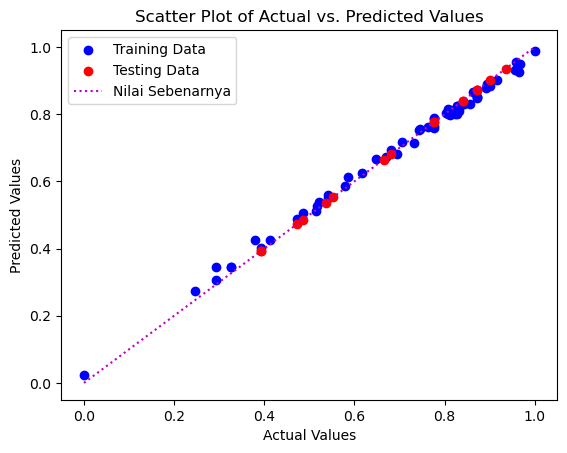

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 20:80")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training GBR + SPLITING 20:80")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing GBR + SPLITING 20:80 + poli
Mean Squared Error: 4.543521995865015e-11
Root Mean Squared Error: 6.740565255128842e-06
Mean Absolute Error: 5.672429024432268e-06
R^2 Score: 0.9999999986522172
 
Hasil Training GBR + SPLITING 20:80 + poli
Mean Squared Error: 5.098419138640917e-05
Root Mean Squared Error: 0.007140321518419823
Mean Absolute Error: 0.00583271824001102
R^2 Score: 0.9988826596771341


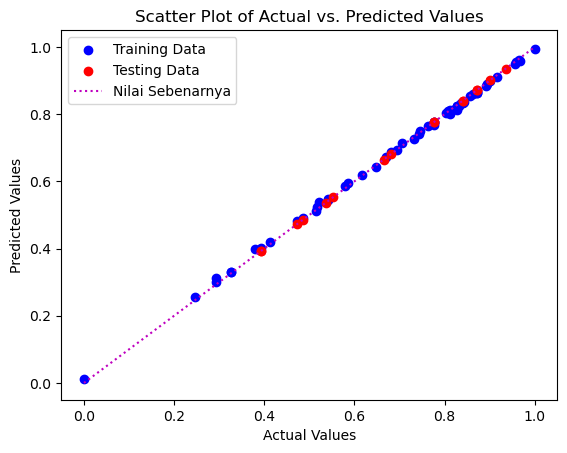

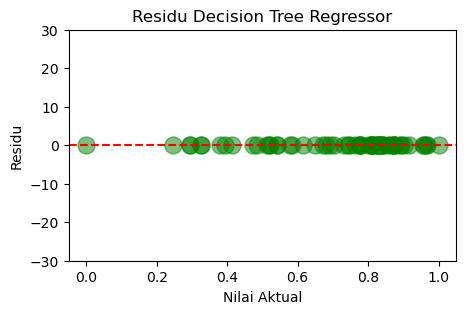

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model dengan fitur polinomial derajat 2
model_pipeline = make_pipeline(PolynomialFeatures(degree=2), GradientBoostingRegressor())

# Evaluasi model pada subset pengujian
print("Hasil Testing GBR + SPLITING 20:80 + poli")
prediction_test = evaluation(X_test, y_test, model_pipeline)
print(" ")
print("Hasil Training GBR + SPLITING 20:80 + poli")
prediction_train = evaluation(X_train, y_train, model_pipeline)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()

residuals = y_train - prediction_train

plt.figure(figsize=(5, 3))
plt.scatter(y_train, residuals, color='g', s=150, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Residu')
plt.title('Residu Decision Tree Regressor')
plt.ylim(-30, 30)
# plt.savefig('Residu Decision Tree Regressor')
plt.show()

In [22]:
import numpy as np

mse = 3.9995543698004296e-08
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error training: {rmse}')

Root Mean Squared Error training: 0.0001999888589347024


In [23]:
import numpy as np

mse = 0.06910554655937168
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error training: {rmse}')

Root Mean Squared Error training: 0.26287933840332844


Hasil Testing GBR pada Fold
Mean Squared Error: 0.00010817951661837257
Root Mean Squared Error: 0.010400938256636879
Mean Absolute Error: 0.00875742830006542
R^2 Score: 0.9999961672785082
 
Hasil Testing GBR pada Fold
Mean Squared Error: 0.0001531172816170117
Root Mean Squared Error: 0.012374056797065856
Mean Absolute Error: 0.010660531392935888
R^2 Score: 0.9999972447014003
 
Hasil Testing GBR pada Fold
Mean Squared Error: 0.0006897963984556761
Root Mean Squared Error: 0.02626397529803278
Mean Absolute Error: 0.023405027447756
R^2 Score: 0.999980877165844
 
Average RMSE across folds: 89.58274358974357


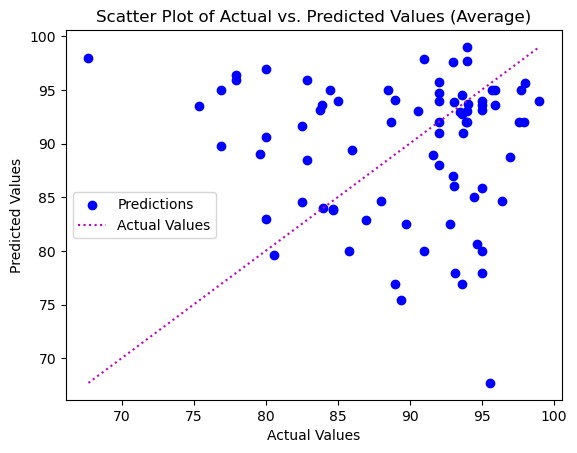

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Contoh data X dan y (pastikan diubah sesuai data Anda)
X = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']].values
y = data_model['IE EXP (%)'].values

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Inisialisasi objek KFold dengan nilai k=5
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# List untuk menyimpan prediksi dari setiap fold
all_predictions = []

# Loop melalui setiap fold pada KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Evaluasi model pada subset pengujian
    print("Hasil Testing GBR pada Fold")
    prediction_test = evaluation(X_test, y_test, gbr)
    all_predictions.extend(prediction_test)
    print(" ")

# Cetak rata-rata skor RMSE dari semua fold
average_rmse = np.mean(all_predictions)
print(f"Average RMSE across folds: {average_rmse}")

# Visualisasi scatter plot hasil prediksi rata-rata dari semua fold
plt.scatter(y, all_predictions, c='b', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Actual Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values (Average)")
plt.legend()
plt.show()


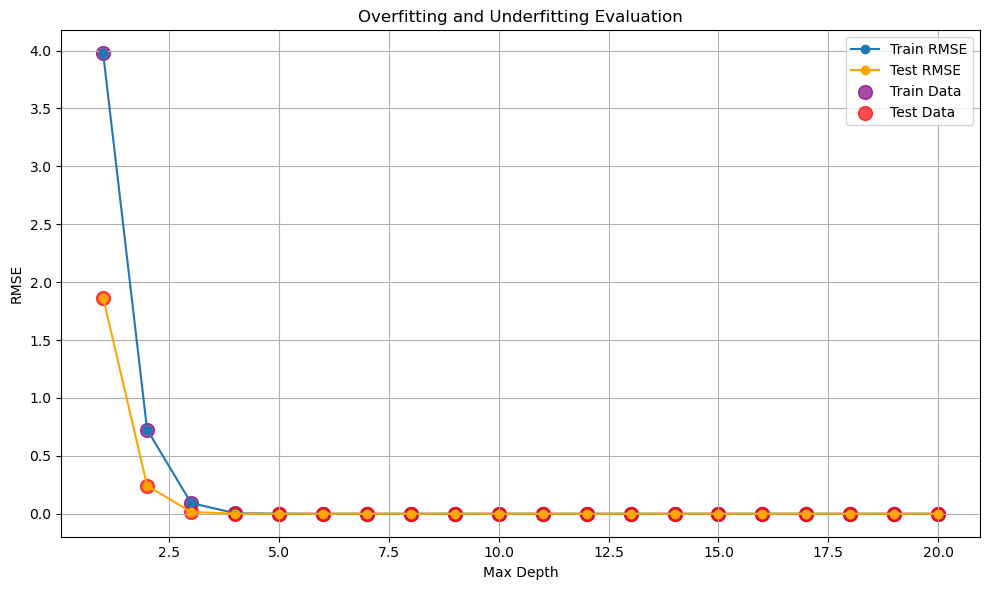

NameError: name 'y_train_pred_decTree' is not defined

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def evaluation_rmse(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, prediction))
    return rmse

# Bagi data menjadi subset pelatihan (60%) dan pengujian (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model dengan fitur polinomial derajat 2
model_pipeline = make_pipeline(PolynomialFeatures(degree=5), GradientBoostingRegressor())

# Evaluasi model pada subset pengujian
model_pipeline.fit(X_train, y_train)

# Prediksi pada data pelatihan dan pengujian
prediction_train = model_pipeline.predict(X_train)
prediction_test = model_pipeline.predict(X_test)

# Visualisasi grafik evaluasi model untuk overfitting dan underfitting
plt.figure(figsize=(10, 6))
max_depth_range = range(1, 21)
train_rmse = []
test_rmse = []

for max_depth in max_depth_range:
    model_pipeline = make_pipeline(PolynomialFeatures(degree=2), GradientBoostingRegressor(max_depth=max_depth, random_state=42))
    train_rmse.append(evaluation_rmse(X_train, y_train, model_pipeline))
    test_rmse.append(evaluation_rmse(X_test, y_test, model_pipeline))

plt.plot(max_depth_range, train_rmse, marker='o', label='Train RMSE')
plt.plot(max_depth_range, test_rmse, marker='o', label='Test RMSE', color='orange')
plt.scatter(max_depth_range, train_rmse, c='purple', label='Train Data', s=100, alpha=0.7)
plt.scatter(max_depth_range, test_rmse, c='red', label='Test Data', s=100, alpha=0.7)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Overfitting and Underfitting Evaluation')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

residuals = y_train - y_train_pred_decTree

plt.figure(figsize=(5, 3))
plt.scatter(y_train, residuals, color='g', s=150, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Residu')
plt.title('Residu Decision Tree Regressor')
plt.ylim(-30, 30)
plt.savefig('Residu Decision Tree Regressor')
plt.show()


Hasil Testing GBR pada Fold
Mean Squared Error: 6.04926832360918e-07
Root Mean Squared Error: 0.0007777704239432855
Mean Absolute Error: 0.000656232151900582
R^2 Score: 0.9999999816835438
 
Hasil Training GBR pada Fold
Mean Squared Error: 0.303102826744521
Root Mean Squared Error: 0.5505477515570479
Mean Absolute Error: 0.4502652824902234
R^2 Score: 0.9932196635023324


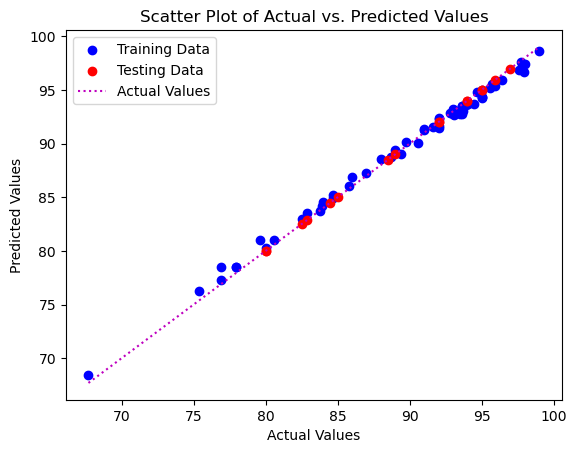

Hasil Testing GBR pada Fold
Mean Squared Error: 7.5677508826315055e-06
Root Mean Squared Error: 0.002750954540269887
Mean Absolute Error: 0.002277665546016827
R^2 Score: 0.9999997301175244
 
Hasil Training GBR pada Fold
Mean Squared Error: 0.18577350598783174
Root Mean Squared Error: 0.43101450786235923
Mean Absolute Error: 0.33546679316944644
R^2 Score: 0.9958322456119967


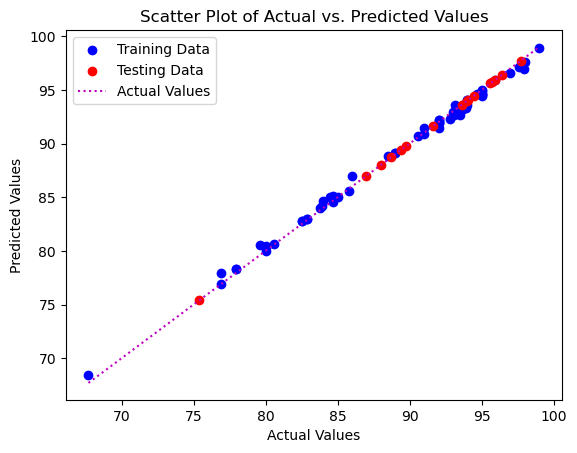

Hasil Testing GBR pada Fold
Mean Squared Error: 9.635694364748303e-06
Root Mean Squared Error: 0.0031041414859423375
Mean Absolute Error: 0.0024760858644157224
R^2 Score: 0.9999998451381101
 
Hasil Training GBR pada Fold
Mean Squared Error: 0.10273091541179082
Root Mean Squared Error: 0.3205166382760664
Mean Absolute Error: 0.2522292083323044
R^2 Score: 0.9970481770572581


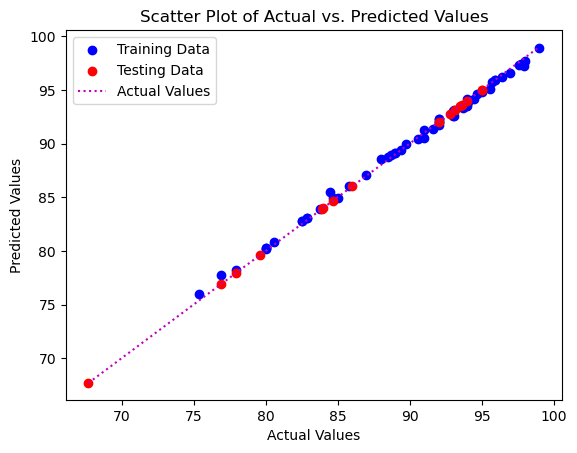

Hasil Testing GBR pada Fold
Mean Squared Error: 1.1337056931482708e-06
Root Mean Squared Error: 0.0010647561660531819
Mean Absolute Error: 0.0009246997903365658
R^2 Score: 0.9999999727237365
 
Hasil Training GBR pada Fold
Mean Squared Error: 0.23827904054677793
Root Mean Squared Error: 0.48813834160694436
Mean Absolute Error: 0.3850931048285174
R^2 Score: 0.994355195877666


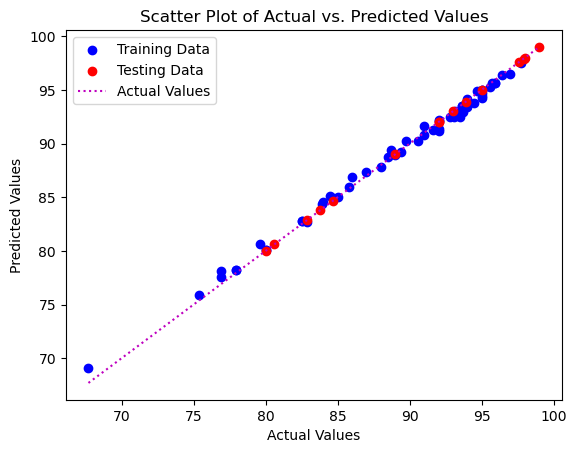

Hasil Testing GBR pada Fold
Mean Squared Error: 8.673161768328533e-07
Root Mean Squared Error: 0.0009312981138351206
Mean Absolute Error: 0.0007434128065663496
R^2 Score: 0.9999999738410611
 
Hasil Training GBR pada Fold
Mean Squared Error: 0.30194227586344
Root Mean Squared Error: 0.5494927441408485
Mean Absolute Error: 0.4221292053901723
R^2 Score: 0.9932197814265196


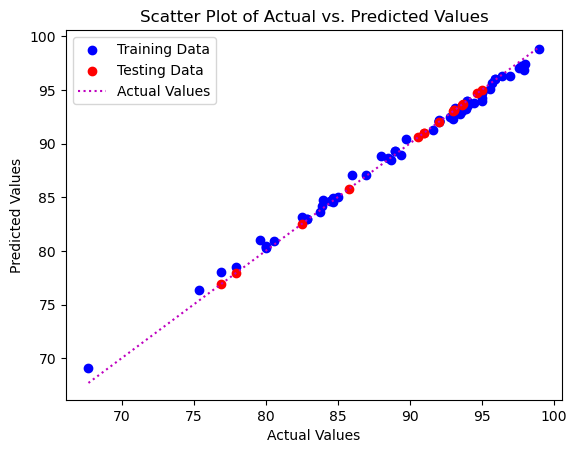

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Contoh data X dan y (pastikan diubah sesuai data Anda)
X = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']].values
y = data_model['IE EXP (%)'].values

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Inisialisasi objek KFold dengan nilai k=5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Loop melalui setiap fold pada KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Inisialisasi model
    gbr = GradientBoostingRegressor()
    
    # Evaluasi model pada subset pengujian
    print("Hasil Testing GBR pada Fold")
    prediction_test = evaluation(X_test, y_test, gbr)
    print(" ")
    print("Hasil Training GBR pada Fold")
    prediction_train = evaluation(X_train, y_train, gbr)
    
    # Visualisasi scatter plot hasil training dan testing dalam satu grafik
    plt.scatter(y_train, prediction_train, c='b', label='Training Data')
    plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
    plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Actual Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Scatter Plot of Actual vs. Predicted Values")
    plt.legend()
    plt.show()


Hasil Testing GBR pada Fold + poli
Mean Squared Error: 3.999554369800429e-08
Root Mean Squared Error: 0.00019998885893470237
Mean Absolute Error: 0.0001661650130300174
R^2 Score: 0.999999998788983
 
Hasil Training GBR pada Fold+ poli 
Mean Squared Error: 0.06910554655937154
Root Mean Squared Error: 0.26287933840332817
Mean Absolute Error: 0.20782728644935247
R^2 Score: 0.9984541257349516


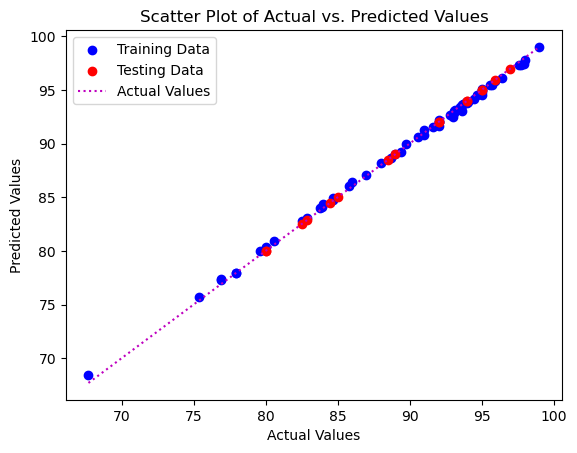

Hasil Testing GBR pada Fold + poli
Mean Squared Error: 1.0568224803331739e-06
Root Mean Squared Error: 0.001028018715944984
Mean Absolute Error: 0.0008485313263051353
R^2 Score: 0.9999999623114091
 
Hasil Training GBR pada Fold+ poli 
Mean Squared Error: 0.020180306076938347
Root Mean Squared Error: 0.1420574041609178
Mean Absolute Error: 0.11537715815987487
R^2 Score: 0.9995472628954479


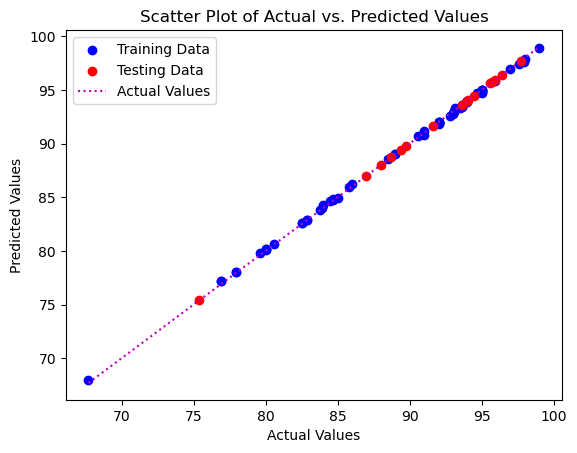

Hasil Testing GBR pada Fold + poli
Mean Squared Error: 6.396394919846784e-07
Root Mean Squared Error: 0.0007997746507514967
Mean Absolute Error: 0.0006338941467047832
R^2 Score: 0.9999999897199126
 
Hasil Training GBR pada Fold+ poli 
Mean Squared Error: 0.022754752673376472
Root Mean Squared Error: 0.15084678542606228
Mean Absolute Error: 0.10858193381614184
R^2 Score: 0.9993461753871418


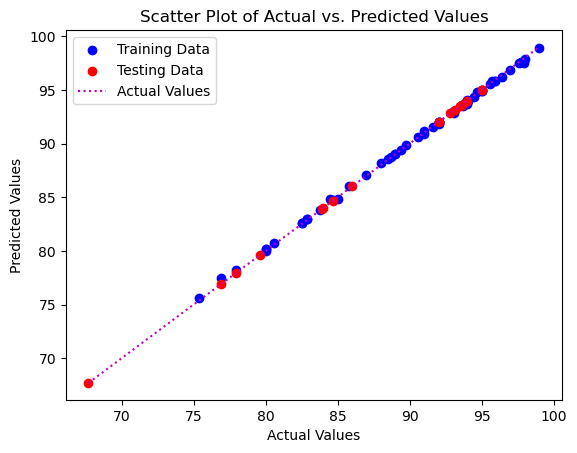

Hasil Testing GBR pada Fold + poli
Mean Squared Error: 2.0667271550890633e-07
Root Mean Squared Error: 0.00045461270935699357
Mean Absolute Error: 0.0003828435706831594
R^2 Score: 0.9999999950275813
 
Hasil Training GBR pada Fold+ poli 
Mean Squared Error: 0.02955690780990606
Root Mean Squared Error: 0.17192122559447412
Mean Absolute Error: 0.13860515897556208
R^2 Score: 0.9992998001223022


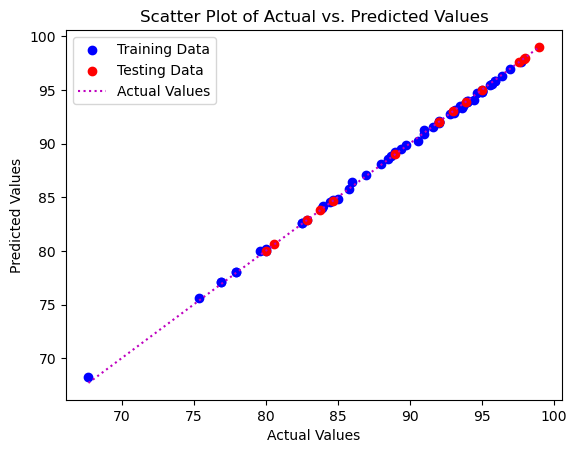

Hasil Testing GBR pada Fold + poli
Mean Squared Error: 2.822543397647549e-07
Root Mean Squared Error: 0.000531276142664768
Mean Absolute Error: 0.0004629626398705492
R^2 Score: 0.9999999914869868
 
Hasil Training GBR pada Fold+ poli 
Mean Squared Error: 0.07397680545960626
Root Mean Squared Error: 0.2719867744203866
Mean Absolute Error: 0.20843473489551168
R^2 Score: 0.9983388251646788


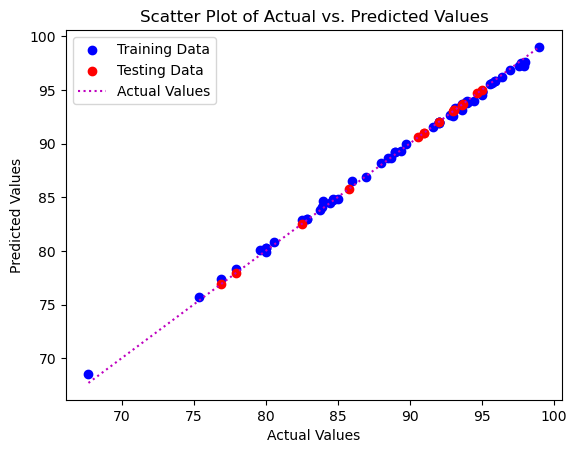

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Contoh data X dan y (pastikan diubah sesuai data Anda)
X = data_model[['Molecular_weight MW (g/mol)', 'pKa', 'Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)','HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']].values
y = data_model['IE EXP (%)'].values

# Inisialisasi objek PolynomialFeatures dengan derajat 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Inisialisasi objek KFold dengan nilai k=5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Loop melalui setiap fold pada KFold
for train_index, test_index in kf.split(X_poly):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Inisialisasi model
    gbr = GradientBoostingRegressor()
    
    # Evaluasi model pada subset pengujian
    print("Hasil Testing GBR pada Fold + poli")
    prediction_test = evaluation(X_test, y_test, gbr)
    print(" ")
    print("Hasil Training GBR pada Fold+ poli ")
    prediction_train = evaluation(X_train, y_train, gbr)
    
    # Visualisasi scatter plot hasil training dan testing dalam satu grafik
    plt.scatter(y_train, prediction_train, c='b', label='Training Data')
    plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
    plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Actual Values')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Scatter Plot of Actual vs. Predicted Values")
    plt.legend()
    plt.show()


In [ ]:
# Membuat objek scaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada data
normalized_data = scaler.fit_transform(data_model)

# Mengonversi data yang telah dinormalisasi menjadi data frame
normalized_df = pd.DataFrame(normalized_data, columns=data_model.columns)

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model, kfold=5):
    kf = KFold(n_splits=kfold, shuffle=True, random_state=42)
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        prediction = model.predict(X_test)

        mse = mean_squared_error(y_test, prediction)
        rmse = mean_squared_error(y_test, prediction, squared=False)
        mae = mean_absolute_error(y_test, prediction)
        r2 = r2_score(y_test, prediction)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    print(f'Average Mean Squared Error: {sum(mse_scores) / kfold}')
    print(f'Average Root Mean Squared Error: {sum(rmse_scores) / kfold}')
    print(f'Average Mean Absolute Error: {sum(mae_scores) / kfold}')
    print(f'Average R^2 Score: {sum(r2_scores) / kfold}')

    return model

# Example usage
model = GradientBoostingRegressor()  # Replace with your actual model
model = evaluation(X, y, model, kfold=5)


Average Mean Squared Error: 53.55116297642619
Average Root Mean Squared Error: 7.027307698668738
Average Mean Absolute Error: 5.304272604848146
Average R^2 Score: -0.3119239261854472


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    mae = mean_absolute_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)

    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')

    return model

# Example usage
model = GradientBoostingRegressor()  # Replace with your actual model
model = evaluation(X, y, model, test_size=0.2)


Mean Squared Error: 20.467000749674156
Root Mean Squared Error: 4.524046943796467
Mean Absolute Error: 2.9487319855514142
R^2 Score: 0.38028385639067597


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        
        mse = mean_squared_error(y_test, prediction)
        rmse = mean_squared_error(y_test, prediction, squared=False)
        mae = mean_absolute_error(y_test, prediction)
        r2 = r2_score(y_test, prediction)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    print(f'Average Mean Squared Error: {np.mean(mse_scores)}')
    print(f'Average Root Mean Squared Error: {np.mean(rmse_scores)}')
    print(f'Average Mean Absolute Error: {np.mean(mae_scores)}')
    print(f'Average R^2 Score: {np.mean(r2_scores)}')

# Inisialisasi model
gbr = GradientBoostingRegressor()

# Evaluasi model dengan k-fold cross-validation
evaluation(X, y, gbr)


Average Mean Squared Error: 54.315240102225815
Average Root Mean Squared Error: 7.062885231638863
Average Mean Absolute Error: 5.338966656228166
Average R^2 Score: -0.3329913068183822


# NUSVR

Hasil Testing NuSVR + SPLITING 20:80
Mean Squared Error: 31.341404761999
Root Mean Squared Error: 5.598339464698349
Mean Absolute Error: 5.066978326081364
R^2 Score: 0.05101999399134516
 
Hasil Training NuSVR + SPLITING 20:80
Mean Squared Error: 44.61302220575269
Root Mean Squared Error: 6.679298032409745
Mean Absolute Error: 5.541434547624743
R^2 Score: 0.002017546382418245


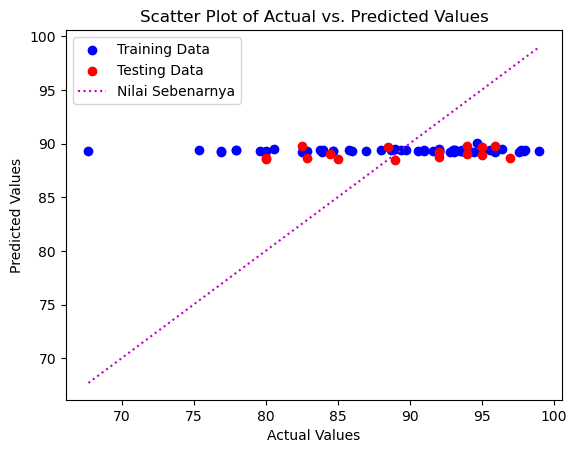

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
gbr = NuSVR()

# Evaluasi model pada subset pengujian
print("Hasil Testing NuSVR + SPLITING 20:80")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training NuSVR + SPLITING 20:80")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing NuSVR + SPLITING 30:70
Mean Squared Error: 27.253466505992282
Root Mean Squared Error: 5.220485274952155
Mean Absolute Error: 4.530221897065028
R^2 Score: 0.030210781028075173
 
Hasil Training NuSVR + SPLITING 30:70
Mean Squared Error: 48.20312417555327
Root Mean Squared Error: 6.942846979125585
Mean Absolute Error: 5.89960086583252
R^2 Score: 0.0036051350460083453


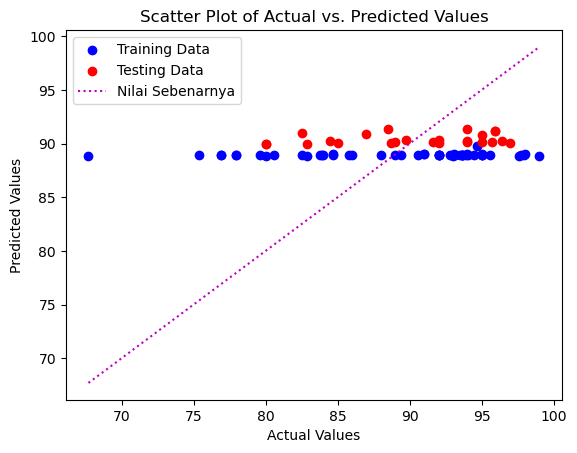

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
gbr = NuSVR()

# Evaluasi model pada subset pengujian
print("Hasil Testing NuSVR + SPLITING 30:70")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training NuSVR + SPLITING 30:70")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing NuSVR + SPLITING 40:60
Mean Squared Error: 32.8887906278308
Root Mean Squared Error: 5.734874944393365
Mean Absolute Error: 4.644048461020713
R^2 Score: -0.02467047903575814
 
Hasil Training NuSVR + SPLITING 40:60
Mean Squared Error: 48.03730568841571
Root Mean Squared Error: 6.930895013518507
Mean Absolute Error: 5.949317023361036
R^2 Score: 0.011112531941291026


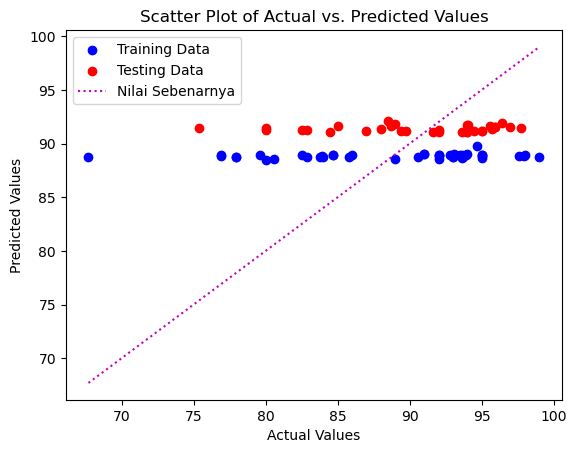

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model
gbr = NuSVR()

# Evaluasi model pada subset pengujian
print("Hasil Testing NuSVR + SPLITING 40:60")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training NuSVR + SPLITING 40:60")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


# random FOrest

Hasil Testing RF + SPLITING 20:80
Mean Squared Error: 2.3285894543750087
Root Mean Squared Error: 1.5259716427165377
Mean Absolute Error: 1.190731249999998
R^2 Score: 0.929493114581647
 
Hasil Training RF + SPLITING 20:80
Mean Squared Error: 8.953896860793442
Root Mean Squared Error: 2.9923062779056293
Mean Absolute Error: 2.4136822580644988
R^2 Score: 0.7997035054616597


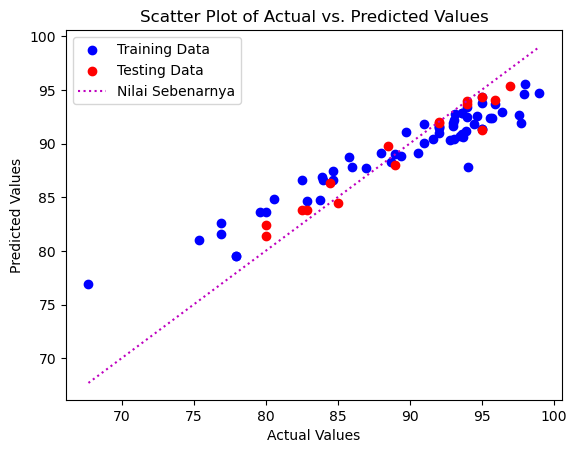

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
gbr = RandomForestRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing RF + SPLITING 20:80")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training RF + SPLITING 20:80")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing RF + SPLITING 30:70
Mean Squared Error: 0.0024122248653485703
Root Mean Squared Error: 0.049114405884104616
Mean Absolute Error: 0.040159211927582594
R^2 Score: 0.9159065700546026
 
Hasil Training RF + SPLITING 30:70
Mean Squared Error: 0.008476762366152841
Root Mean Squared Error: 0.09206933455908564
Mean Absolute Error: 0.0757199503017393
R^2 Score: 0.8283376801408182


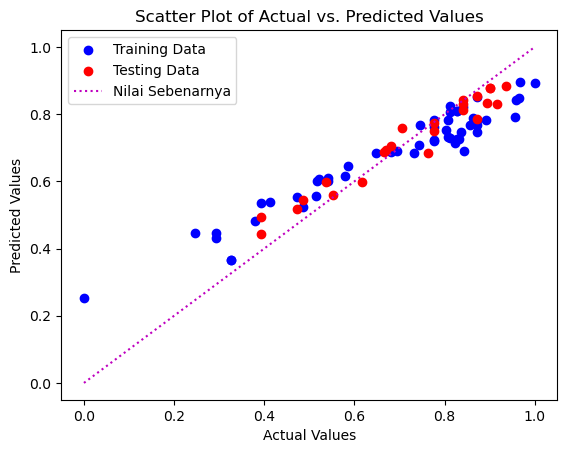

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib , pickle

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    joblib.dump(model, 'modelrandomforest_forweb.joblib')
    
    with open('modelrandomforest_forweb.pkl', 'wb') as file :
        pickle.dump(model, file)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
gbr = RandomForestRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing RF + SPLITING 30:70")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training RF + SPLITING 30:70")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
gbr = RandomForestRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing RF + SPLITING 40:60")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training RF + SPLITING 40:60")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


# Bagging

Hasil Testing BGR + SPLITING 20:80
Mean Squared Error: 2.480681124999997
Root Mean Squared Error: 1.5750178173595362
Mean Absolute Error: 1.3558750000000002
R^2 Score: 0.9248879618898772
 
Hasil Training BGR + SPLITING 20:80
Mean Squared Error: 8.571352534193537
Root Mean Squared Error: 2.927687232986737
Mean Absolute Error: 2.2874064516129
R^2 Score: 0.8082609289851534


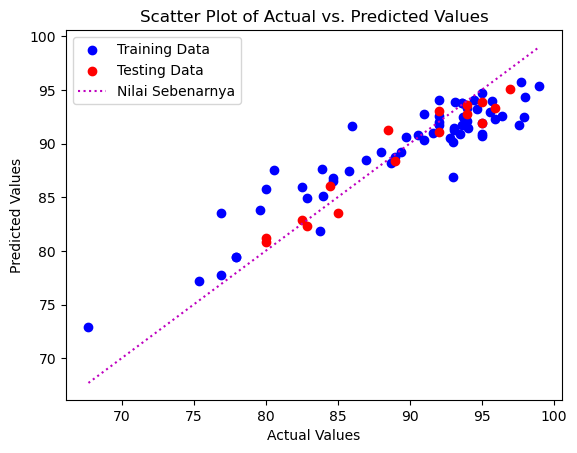

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
gbr = BaggingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing BGR + SPLITING 20:80")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training BGR + SPLITING 20:80")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing BGR + SPLITING 30:70
Mean Squared Error: 2.6628596250000043
Root Mean Squared Error: 1.631827081831897
Mean Absolute Error: 1.3525416666666665
R^2 Score: 0.9052446207020004
 
Hasil Training BGR + SPLITING 30:70
Mean Squared Error: 15.157984515555533
Root Mean Squared Error: 3.8933256369786915
Mean Absolute Error: 3.074214814814812
R^2 Score: 0.686673048839198


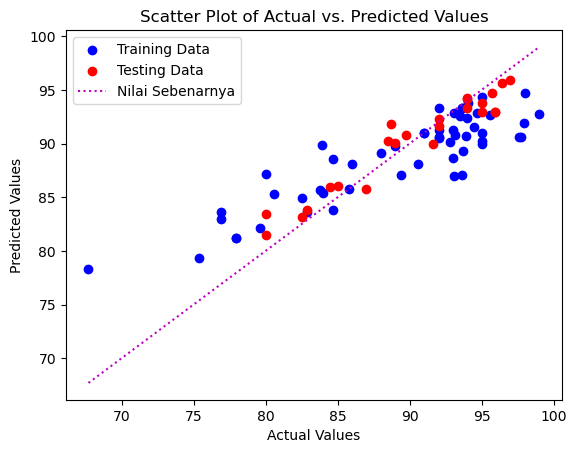

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model
gbr = BaggingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing BGR + SPLITING 30:70")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training BGR + SPLITING 30:70")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()


Hasil Testing BGR + SPLITING 40:60
Mean Squared Error: 5.1071161874999955
Root Mean Squared Error: 2.2598929593013906
Mean Absolute Error: 1.6980624999999998
R^2 Score: 0.8408846573425358
 
Hasil Training BGR + SPLITING 40:60
Mean Squared Error: 10.292834690434766
Root Mean Squared Error: 3.2082447990193588
Mean Absolute Error: 2.417295652173911
R^2 Score: 0.7881135278029251


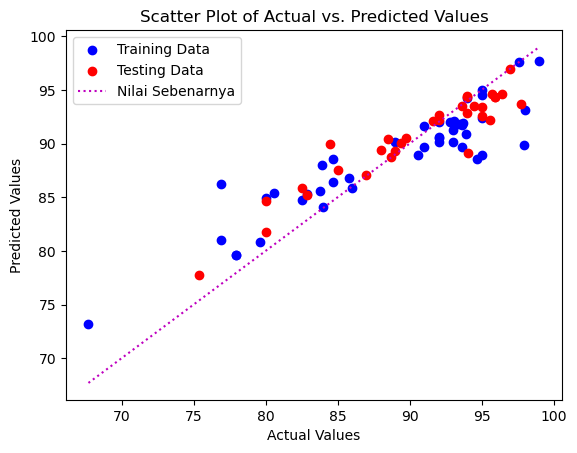

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)
    
    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')
    
    return prediction

# Bagi data menjadi subset pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inisialisasi model
gbr = BaggingRegressor()

# Evaluasi model pada subset pengujian
print("Hasil Testing BGR + SPLITING 40:60")
prediction_test = evaluation(X_test, y_test, gbr)
print(" ")
print("Hasil Training BGR + SPLITING 40:60")
prediction_train = evaluation(X_train, y_train, gbr)

# Visualisasi scatter plot hasil training dan testing dalam satu grafik
plt.scatter(y_train, prediction_train, c='b', label='Training Data')
plt.scatter(y_test, prediction_test, c='r', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='m', linestyle='dotted', label='Nilai Sebenarnya')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.legend()
plt.show()
